Inspired by Minard's classic visualization of Napoleon's Russian Campaign, I created a redesign of this graphic.  I attempted to focus on a correlation, if any, between weather and loss of life.

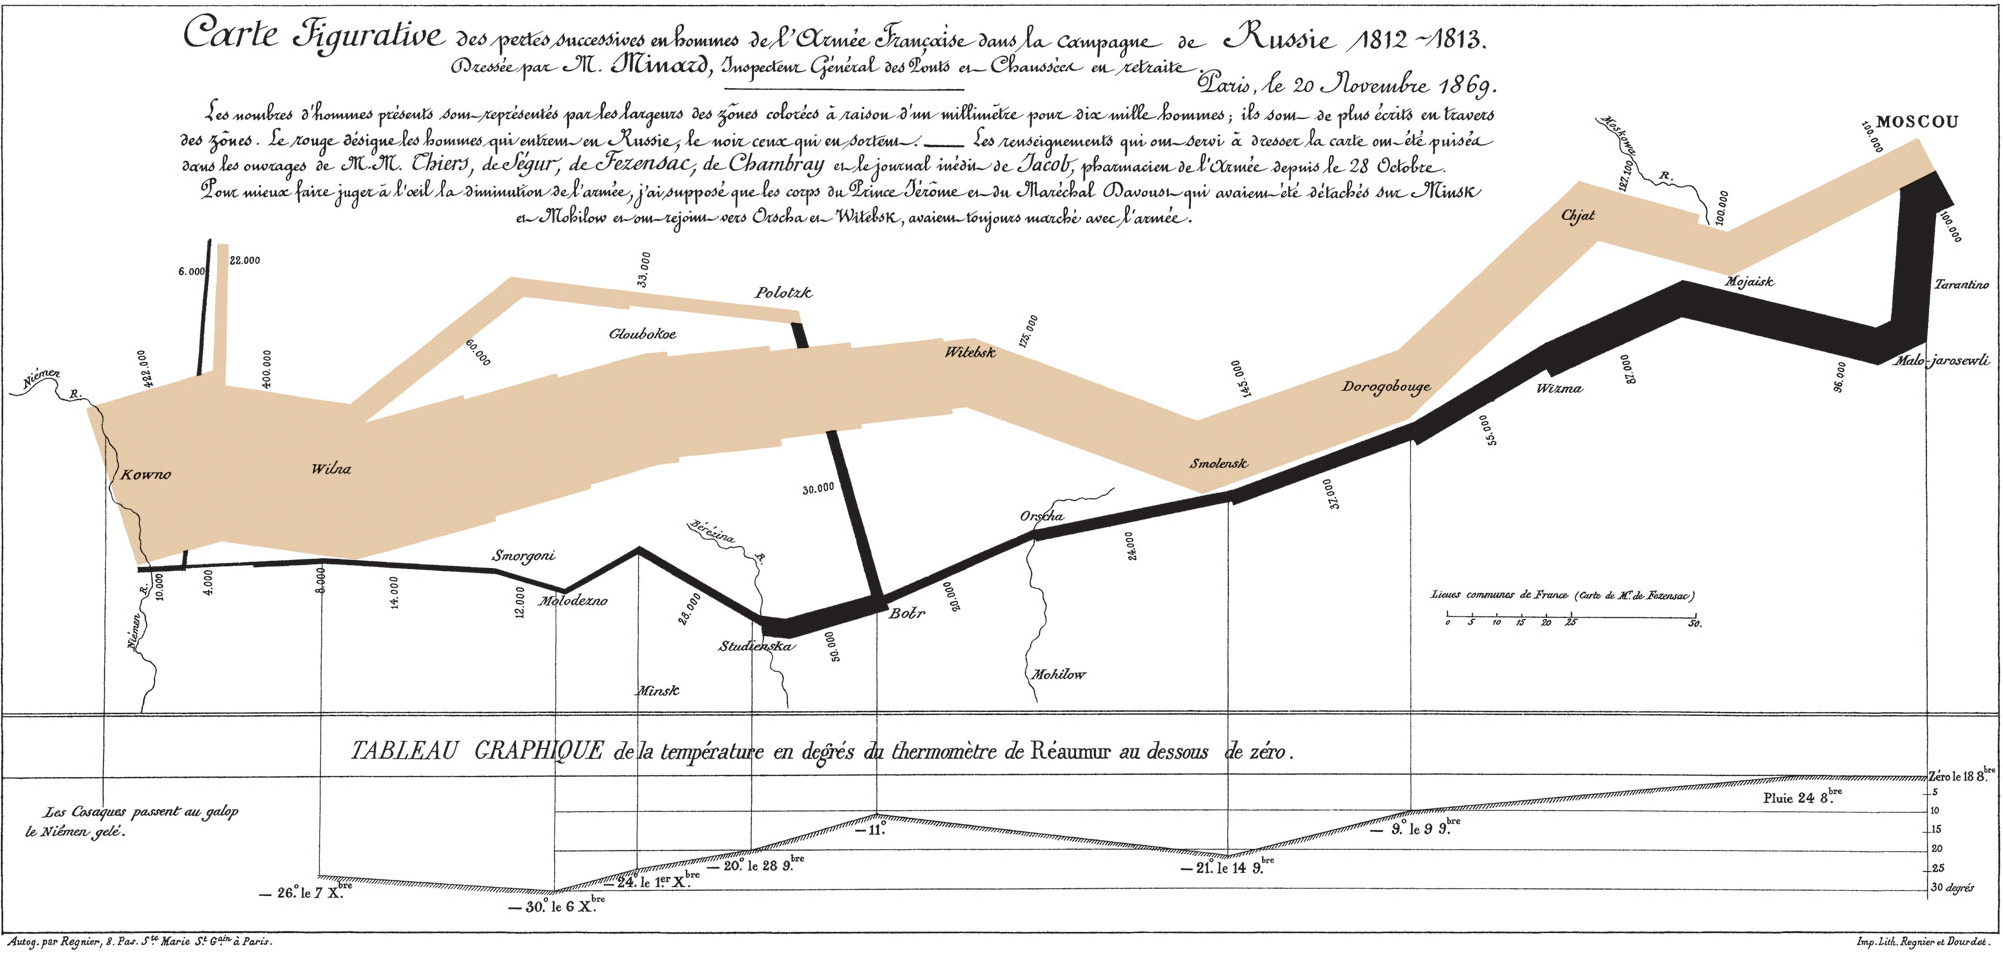

Minard's dwindling returns suggest loss of human life due to the conflict.  One might reasonably walk away thinking these people were killed in battle.  Historically, this tends to be less than accurate, particularly wars before the 20th century, when much loss of life can be attributed to external factors only aggravated by the fighting.  In reality, weapons were so inefficient and inaccurate it was relatively rare to be killed in battle.  Minard's graphic does account for this, with a separate indication of temperature during the retreat.  My first thought is to illuminate the temperature and minimize the geography.  I am also mindful of the classic blunder, of not starting a land war in Asia.  Thankfully (? maybe not for Russians) it went unheeded in the 20th century.

In [3]:
import pandas as pd
import plotly.graph_objects as go
!pip install scipy
from scipy.stats import pearsonr


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\arlux\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/44.5 MB 6.3 MB/s eta 0:00:07
   ---- ----------------------------------- 5.0/44.5 MB 13.3 MB/s eta 0:00:03
   -------- ------------------------------- 9.4/44.5 MB 16.3 MB/s eta 0:00:03
   ------------ --------------------------- 13.6/44.5 MB 17.1 MB/s eta 0:00:02
   ---------------- ----------------------- 17.8/44.5 MB 17.6 MB/s eta 0:00:02
   -------------------- ------------------- 22.3/44.5 MB 18.2 MB/s eta 0:00:02
   ----------------------- ---------------- 25.7/44.5 MB 18.0 MB/s eta 0:00:02
   -------------------------- ------------- 29.1/44.5 MB 17.9 MB/s eta 0:00:01
   ----------------------------- ---------- 32.2/44.5 MB 17.5 MB/s eta 0:00:01
   ------------------------------ --------- 34.3/44.5 MB 16.7 MB/s eta 0:00:01
   --------------------------------- ------ 37.0/44.5 MB 16.5 MB/s eta 0:00:01
   ----------------------------------- ---- 39.6/44.5 MB 16.2 MB/

In [5]:
troops = pd.read_csv('minard-troops.csv')
weather = pd.read_csv('minard-temp.csv')

I want to get a sense of this weather chart, reading left to right, but keeping the lines intact. (with help from ChatGPT)

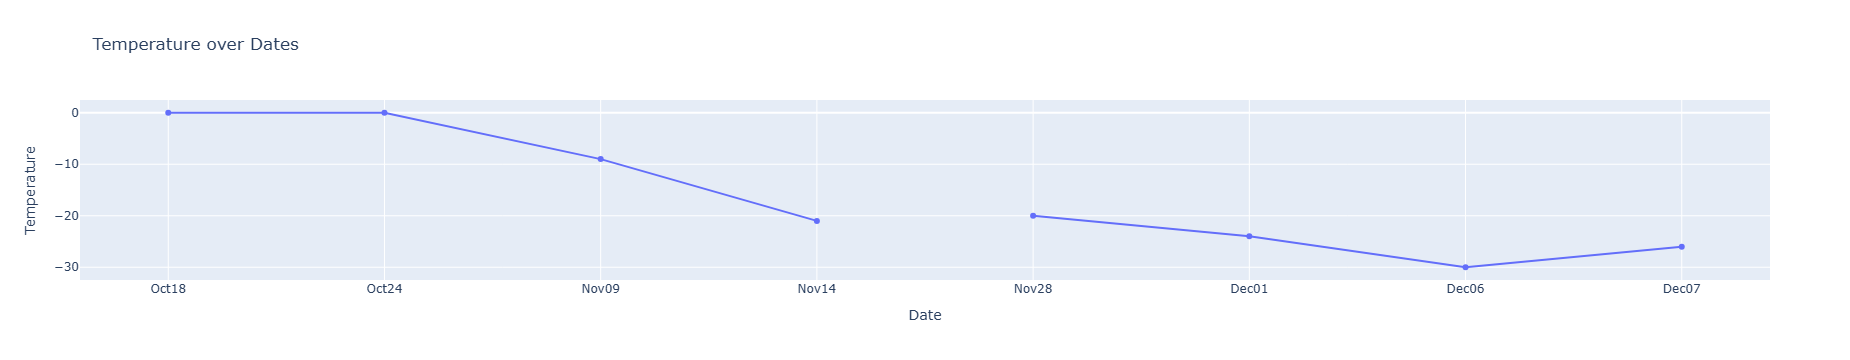

In [6]:
# Data preparation
data = weather

# Create the figure
fig = go.Figure()

# Add the line for temperature
fig.add_trace(go.Scatter(x=data['date'], y=data['temp'], mode='lines+markers', name='Temperature'))

# Customize the layout
fig.update_layout(
    title="Temperature over Dates",
    xaxis_title="Date",
    yaxis_title="Temperature"
)

# Display the figure
fig.show()

Obviously I've missed the point a bit, by not intepreting the "days" column.  Let me retry:

In [7]:
import numpy as np

weather['days'] = np.cumsum(weather['days']) # I would prefer a cumulative sum not a relative difference
weather.loc[4, "date"] = "Nov24" # Fill in the gap

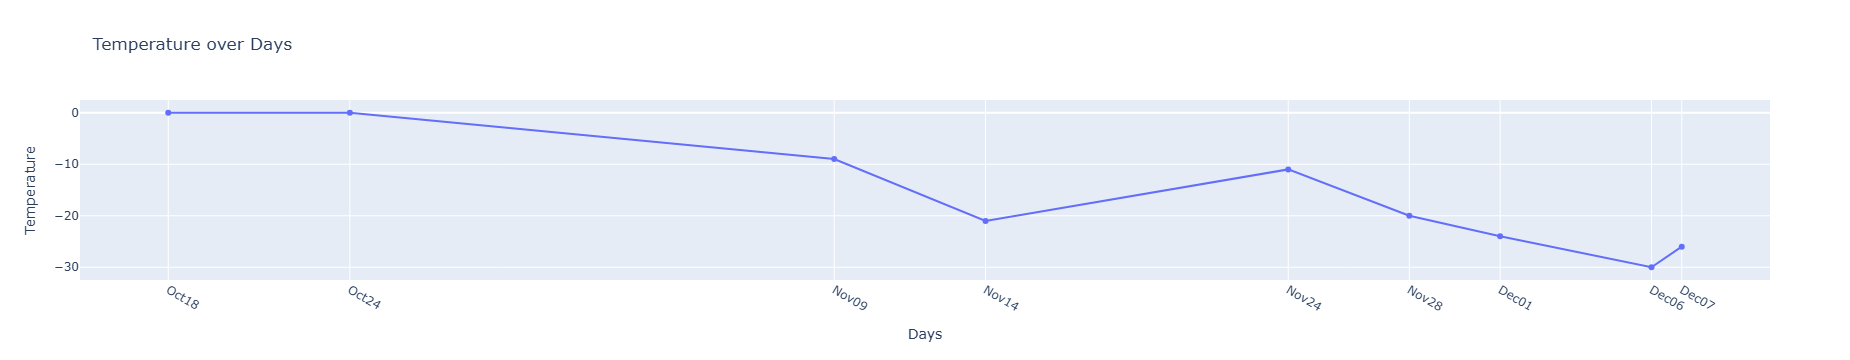

In [8]:
# Data preparation
data = weather

# Create the figure
fig = go.Figure()


# Add the line for temperature, with 'days' as the x-axis values
fig.add_trace(go.Scatter(x=data['days'], y=data['temp'], mode='lines+markers', name='Temperature'))

# Customize the layout and manually set the tick labels for the x-axis to match the 'date'
fig.update_layout(
    title="Temperature over Days",
    xaxis=dict(
        title="Days",
        tickmode='array',
        tickvals=data['days'],  # Use 'days' to control spacing
        ticktext=data['date']   # Use 'date' for labels
    ),
    yaxis_title="Temperature"
)

# Display the figure
fig.show()


Now I want to add in the survivors on the retreat as a bar chart:

In [9]:
# Data for the bar chart (from separate data source)
retreat = troops[(troops['direction'] == 'Retreat') & (troops['group'] == 1)].reset_index(drop=True)
retreat['day'] = np.arange(6, len(retreat) * 3 + 6, 3)  # starting at 6 since the first date (Oct18) comprises 6 days
# acknowledging I don't have the number of days a "survivors" is accurate for, making my best guess based on the original image (3 days per line)

print(retreat)

    long   lat  survivors direction  group  day
0   37.7  55.7     100000   Retreat      1    6
1   37.5  55.7      98000   Retreat      1    9
2   37.0  55.0      97000   Retreat      1   12
3   36.8  55.0      96000   Retreat      1   15
4   35.4  55.3      87000   Retreat      1   18
5   34.3  55.2      55000   Retreat      1   21
6   33.3  54.8      37000   Retreat      1   24
7   32.0  54.6      24000   Retreat      1   27
8   30.4  54.4      20000   Retreat      1   30
9   29.2  54.3      20000   Retreat      1   33
10  28.5  54.2      20000   Retreat      1   36
11  28.3  54.3      20000   Retreat      1   39
12  27.5  54.5      20000   Retreat      1   42
13  26.8  54.3      12000   Retreat      1   45
14  26.4  54.4      14000   Retreat      1   48
15  25.0  54.4       8000   Retreat      1   51
16  24.4  54.4       4000   Retreat      1   54
17  24.2  54.4       4000   Retreat      1   57
18  24.1  54.4       4000   Retreat      1   60


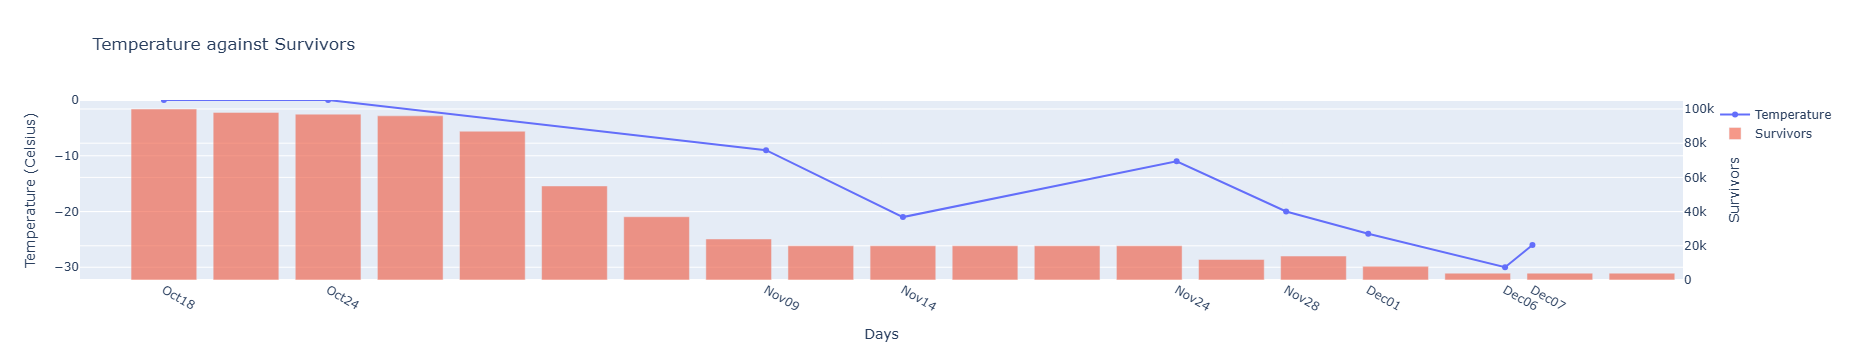

In [10]:
# Create the figure
fig = go.Figure()

# Add the line chart for temperature (y-axis on the left)
fig.add_trace(go.Scatter(x=data['days'], y=data['temp'], mode='lines+markers', name='Temperature'))

# Add the bar chart for the separate data (y-axis on the right)
fig.add_trace(go.Bar(x=retreat['day'], y=retreat['survivors'], name='Survivors', opacity=0.6, yaxis='y2'))

# Customize the layout for dual y-axes
fig.update_layout(
    title="Temperature against Survivors",
    xaxis=dict(
        title="Days",
        tickmode='array',
        tickvals=data['days'],
        ticktext=data['date']  # Use 'date' for labels
    ),
    yaxis=dict(
        title="Temperature (Celsius)",  # Left y-axis for temperature
        rangemode="tozero"  # Ensure the axis starts at zero
    ),
    yaxis2=dict(
        title="Survivors",  # Right y-axis for bar values
        overlaying='y',
        side='right',  # Align this axis to the right
        rangemode="tozero"  # Ensure the axis starts at zero
    )
)

# Display the figure
fig.show()

This is looking promising.  Let me do the same treatment for the 2 other groups of survivors, who will become stacked bar charts.

In [11]:
retreat2 = troops[(troops['direction'] == 'Retreat') & (troops['group'] == 2)].reset_index(drop=True)
retreat2['day'] = np.arange(42, len(retreat2) * 3 + 42, 3)  # starting at 42 (for purposes of a stacked bar chart)

# group 3 comes after the last temperature indicactor, wondering if it makes sense to exclude?

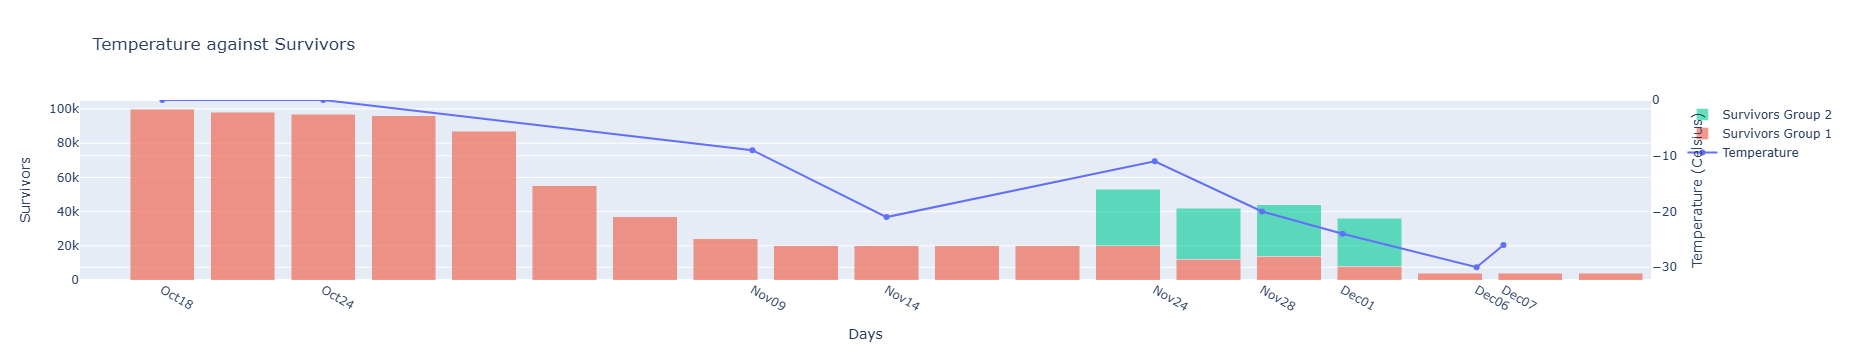

In [12]:
# Create the figure
fig = go.Figure()

# Add the line chart for temperature (y-axis on the right, secondary axis)
fig.add_trace(go.Scatter(x=data['days'], y=data['temp'], mode='lines+markers', name='Temperature', yaxis='y2'))

# Add the first bar chart (stacked on the left y-axis)
fig.add_trace(go.Bar(x=retreat['day'], y=retreat['survivors'], name='Survivors Group 1', opacity=0.6))

# Add the second bar chart (stacked on the left y-axis)
fig.add_trace(go.Bar(x=retreat2['day'], y=retreat2['survivors'], name='Survivors Group 2', opacity=0.6))

# Customize the layout for stacking bars and dual y-axes
fig.update_layout(
    barmode="stack",  # Ensures bars are stacked
    title="Temperature against Survivors",
    xaxis=dict(
        title="Days",
        tickmode='array',
        tickvals=data['days'],
        ticktext=data['date']  # Use 'date' for labels
    ),
    yaxis=dict(
        title="Survivors",  # Left y-axis for the bar chart
        rangemode="tozero",  # Ensure the axis starts at zero
    ),
    yaxis2=dict(
        title="Temperature (Celsius)",  # Right y-axis for the line chart
        overlaying='y',  # Use the same x-axis
        side='right',  # Align this axis to the right
        rangemode="tozero",  # Ensure the axis starts at zero
    )
)

# Display the figure
fig.show()


I think there is an indication of at least correlation between the two statistics (which, to be fair, Minard was also suggesting).  By focusing on this aspect, it becomes a bit clearer that, yes, cold temperatures can affect survival rates. It is not intended to be an improvement of Minard's graphic, more like a re-emphasis of a particular aspect.  Whereas Minard made it clear it was Napolean's campaign, my graphic suggests only that cold weather is a factor.  It loses a lot of meaning, but hopefully adds an interesting insight.

In terms of data "accuracy"/"fairness", I have made only small assumptions from the original.  As previously indicated, I don't have access to the data for how many days each survivor "bar" lasts for, so it became a bit of trial and error to make it look okay.

I used ChatGPT for much of the actual plotting, but the design was all mine.

In [30]:
# Create a DataFrame
df = pd.DataFrame(data)

# Create a full range of days from 6 to 60
full_days_extended = np.arange(6, 61, 3)

# Combine the full range of days with the original data
df_full_extended = pd.DataFrame({'days': full_days_extended})
df_full_extended = pd.concat([df_full_extended, df[['days', 'long', 'temp']]]).drop_duplicates().sort_values(by='days')

# Interpolate missing values
df_full_extended[['long', 'temp']] = df_full_extended[['long', 'temp']].interpolate(method='linear')

# Fill forward for any remaining NaNs (if applicable)
df_full_extended[['long', 'temp']] = df_full_extended[['long', 'temp']].fillna(method='ffill')

# Convert days to dates starting from the earliest date
start_date = pd.to_datetime("2024-10-18")
df_full_extended['date'] = start_date + pd.to_timedelta(df_full_extended['days'] - df['days'].iloc[0], unit="D")
df_full_extended['date'] = df_full_extended['date'].dt.strftime("%b%d")

# Reset the index for a clean look
df_full_extended = df_full_extended.reset_index(drop=True)

# Filter to keep only rows where 'days' is a multiple of 3
df_cleaned = df_full_extended[df_full_extended['days'] % 3 == 0]

# Drop duplicates to keep only the first occurrence of each 'days' value
df_cleaned = df_cleaned.drop_duplicates(subset='days', keep='last')

# Reset the index for a clean DataFrame
df_cleaned = df_cleaned.reset_index(drop=True)

# Pearson Correlation
pearson_corr, _ = pearsonr(retreat['survivors'], df_cleaned['temp'])
print("Pearson Correlation:", pearson_corr)

Pearson Correlation: 0.895663306582425


C:\Users\arlux\AppData\Local\Temp\ipykernel_26136\4106331843.py:15: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



With a Pearson Correlation of 0.895663306582425 (closer to 1 the higher the correlation) it does seem like my premise might be correct.  How to visualize?

In [32]:
# Calculate the absolute rate of temperature change to map to line thickness
data['rate_of_change'] = data['temp'].diff().abs()
data['days_gap'] = data['days'].diff()
data['rate_of_change_per_day'] = data['rate_of_change'] / data['days_gap']

# Normalize the rate of change to use for line thickness (min thickness of 1, max of 10)
min_thickness = 0.5
max_thickness = 50
data['line_thickness'] = (data['rate_of_change_per_day'] - data['rate_of_change_per_day'].min()) / \
                            (data['rate_of_change_per_day'].max() - data['rate_of_change_per_day'].min()) * \
                            (max_thickness - min_thickness) + min_thickness

# Normalize the rate of change for color mapping (to a scale of 0-1)
data['color_scale'] = (data['rate_of_change_per_day'] - data['rate_of_change_per_day'].min()) / \
                         (data['rate_of_change_per_day'].max() - data['rate_of_change_per_day'].min())

# Fill NaN values for line thickness and color scale
data['line_thickness'] = data['line_thickness'].fillna(min_thickness)
data['color_scale'] = data['color_scale'].fillna(0)

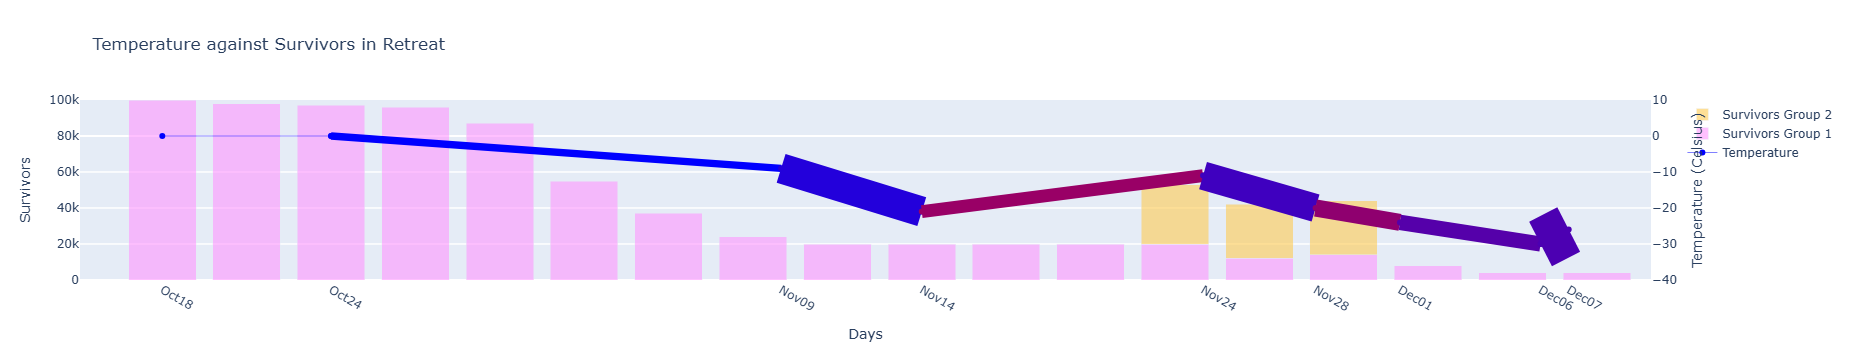

In [33]:
# Create the figure
fig = go.Figure()

# Plot the temperature line with varying thickness and color based on rate of change
for i in range(len(data) - 1):
    fig.add_trace(go.Scatter(
        x=data['days'][i:i+2], y=data['temp'][i:i+2],
        mode='lines+markers',
        line=dict(width=data['line_thickness'][i + 1], 
                  color=f'rgba({int(255 * data["color_scale"][i])}, 0, {int(255 * (1 - data["color_scale"][i]))}, 1)'),
        name='Temperature' if i == 0 else '',  # Only show legend once
        showlegend=(i == 0),
        yaxis='y2'
    ))

# Customize the layout
fig.update_layout(
    title="Temperature Over Time with Varying Line Thickness and Colors (Rate of Change)",
    xaxis_title="Days",
    yaxis_title="Temperature (°C)",
    showlegend=True
)

# Add the first bar chart (stacked on the left y-axis)
fig.add_trace(go.Bar(x=retreat['day'][:-1], y=retreat['survivors'], name='Survivors Group 1', opacity=0.6))

# Add the second bar chart (stacked on the left y-axis)
fig.add_trace(go.Bar(x=retreat2['day'][:-1], y=retreat2['survivors'], name='Survivors Group 2', opacity=0.6))

# Customize the layout for stacking bars and dual y-axes
fig.update_layout(
    barmode="stack",  # Ensures bars are stacked
    title="Temperature against Survivors in Retreat",
    xaxis=dict(
        title="Days",
        tickmode='array',
        tickvals=data['days'],
        ticktext=data['date']  # Use 'date' for labels
    ),
    yaxis=dict(
        title="Survivors",  # Left y-axis for the bar chart
        rangemode="tozero",  # Ensure the axis starts at zero
        range=[0, 100000]
    ),
    yaxis2=dict(
        title="Temperature (Celsius)",  # Right y-axis for the line chart
        overlaying='y',  # Use the same x-axis
        side='right',  # Align this axis to the right
        rangemode="tozero",  # Ensure the axis starts at zero
        range=[-40, 10]
    )
)


# Show the figure
fig.show()



I wanted to emphasize the sudden temperature changes as having a disproportinate affect to the sitution against a gradual temperature change.  Further, I saw an opporunity to pay homage to the original graphic by illustrating large temperature changes with a thicker line.

Additionally I tweaked the scale a little bit to align the 2 y-axis so we didn't have too many grid lines.

Done and done.... let me just attend Thursday's lecture and....


.... oh no!  I almost yelled "crap!" in the chat.


Apparently 2 the y-axis system is unnacceptable due to the inherent deceptiveness of mixing scales.  I think this is a fair assessment.  I didn't really love the bar charts anyway.

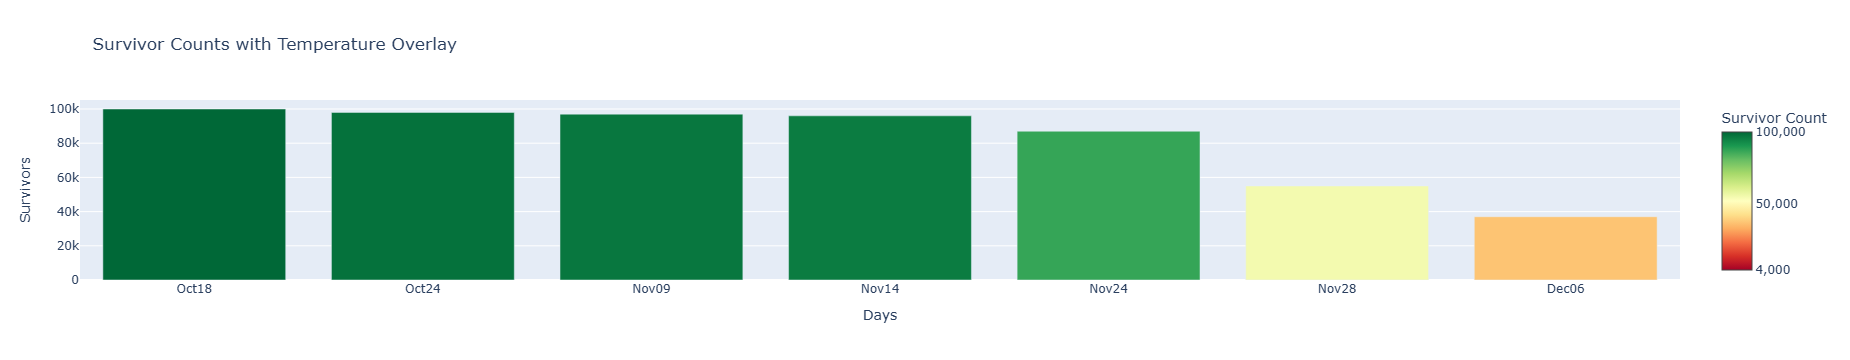

In [34]:
# Sample survivor data (adjust with actual data)
survivor_counts = retreat['survivors']

# Create the bar chart using a color scale based on survivor counts
fig = go.Figure()

# Add the bars with a color scale applied to survivor counts
fig.add_trace(go.Bar(
    x=['Oct18', 'Oct24', 'Nov09', 'Nov14', 'Nov24', 'Nov28', 'Dec06'],  # Adjust dates as needed
    y=survivor_counts,
    marker=dict(
        color=survivor_counts,  # Set color based on survivor counts
        colorscale='RdYlGn',  # Red to Yellow to Green scale
        cmin=4000,  # Minimum survivor count
        cmax=100000,  # Maximum survivor count
        colorbar=dict(
            title="Survivor Count",  # Add a color bar to show the scale
            tickvals=[4000, 50000, 100000],
            ticktext=['4,000', '50,000', '100,000']
        )
    ),
    name="Survivors"
))

# Customize the layout
fig.update_layout(
    title="Survivor Counts with Temperature Overlay",
    xaxis_title="Days",
    yaxis_title="Survivors",
    showlegend=False  # Optional: Hide the legend if not needed
)

# Show the figure
fig.show()


The data is wrong above, but the idea of a color-coded survivor chart begins to take shape.

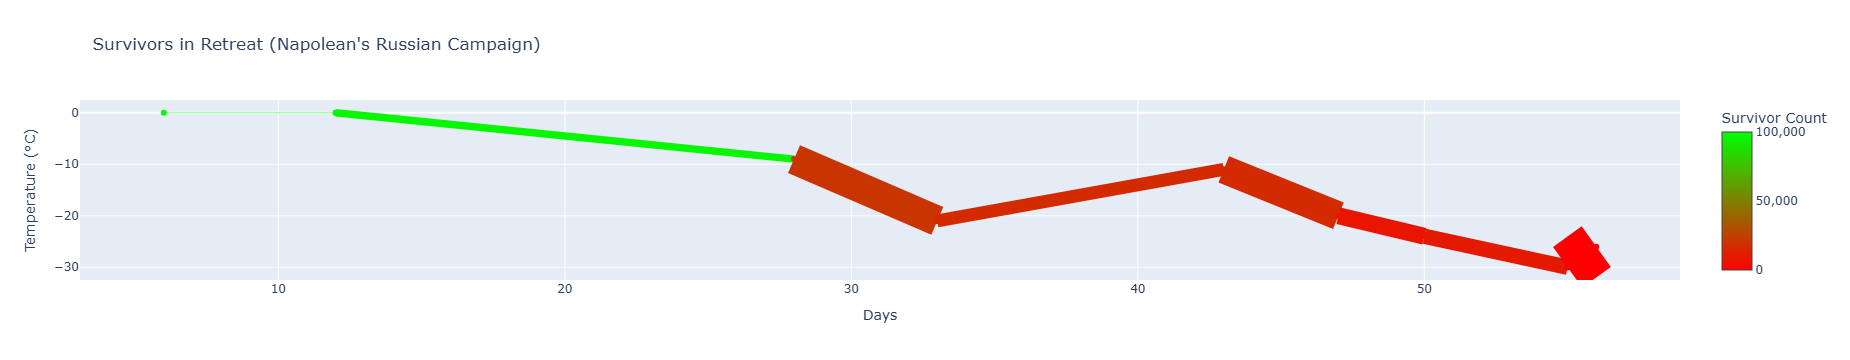

In [36]:
import math

# Sample survivor data (adjust with actual data)
dates = data['date']
temperatures = data['temp']  # Corresponding temperature values

# Create the temperature line chart using the same color scale applied to survivor counts
fig = go.Figure()

# Plot the temperature line with color based on survivor counts
for i in range(len(data) - 1):
    survivor_index = math.floor((data['days'][i] - 6) / 3)
    
    normalized_color = (survivor_counts[survivor_index] - 4000) / (100000 - 4000)  # Normalize survivor counts to the color range (0-1)
    color = f'rgba({int(255 * (1 - normalized_color))}, {int(255 * normalized_color)}, 0, 1)'  # Map to a green-red scale

    fig.add_trace(go.Scatter(
        x=data['days'][i:i+2], y=temperatures[i:i+2],
        mode='lines+markers',
        line=dict(width=data['line_thickness'][i + 1], color=color),
        hoverinfo='text',
        text=[f"Date: {dates[i]}, Temp: {temperatures[i]}°C, Survivors: {survivor_counts[survivor_index]}"]*2,
        showlegend=False
    ))


# Manually construct the colorbar to match the RGB approach
colorscale_custom = [
    [0, 'rgb(255,0,0)'],  # Red at 0 survivors
    [0.5, 'rgb(128,128,0)'],  # Yellow at 50,000 survivors (midpoint)
    [1, 'rgb(0,255,0)']  # Green at 100,000 survivors
]


# Add the color bar to represent survivor counts (same as before)
fig.add_trace(go.Scatter(
    x=dates, y=temperatures,
    mode='markers',
    marker=dict(
        colorscale=colorscale_custom,  # Red to Yellow to Green scale
        cmin=0,  # Minimum survivor count
        cmax=100000,  # Maximum survivor count
        colorbar=dict(
            title="Survivor Count",
            tickvals=[0, 50000, 100000],
            ticktext=['0', '50,000', '100,000']
        )
    ),
    showlegend=False,
    hoverinfo='none'
))

# Customize the layout
fig.update_layout(
    title="Survivors in Retreat (Napolean's Russian Campaign)",
    xaxis_title="Days",
    yaxis_title="Temperature (°C)",
    showlegend=False  # Optional: Hide the legend if not needed
)

# Show the figure
fig.show()


Note that the colour scheme is consistent here.  The scale refers to the survivor count, which consistently drops regardless of slope of interval.

Hoping it's a more honest visualization anyway, even if there might not be too much meaning to it.  There is a vague idea that "red" is toward the bottom of the temperature scale and "green" is toward the top, like a stop light!  It no longer suggests the shape of the curves are related though, which is a tiny bit more honest. Again, not an improvement of the original, just a different angle and an homage.

Of note, I also like that the x-axis scale is changed, no longer emphasizing the occassional day marker that appears on the original.  I didn't think it was too honest to add more day markers, as the "in-between" days of the original markers were only estimates.  

I do want to acknowledge the use of ChatGPT for plotting.  It seldom (if ever) came up with the exact code I wanted, so my coding task was more to adjust the code to get it to do what I wanted (in addition to arguing with the machine to actually produce the thing I wanted it to).  I think this is fair use.  I will accept criticism here, but just want to cite the fact that I'm acknowledging the use of the machine, but it doesn't get credit for the final result (which, in all honesty, it may not even want).

I toyed with the idea of using gradients on each line segment, but rejected it for two reasons:

i) it indicates an accuracy that I don't have.  Even though I have survivor data every 3 days, that's built on an approximation in and of itself
ii) it seems to me it would get very visually distracting

I am rather satisifed with this result.  It's not meant to be a perfect replication of the data, rather a vague indication that as the temperature goes down, the survivors suffer.